In [2]:
import pandas as pd 

all_content = pd.read_csv('all_content_2020_v4.csv')
all_content.head()


C:\Users\frede\AppData\Local\Temp\ipykernel_7172\1951467066.py:3: DtypeWarning: Columns (1,4,8,519,520,521) have mixed types. Specify dtype option on import or set low_memory=False.
  all_content = pd.read_csv('all_content_2020_v4.csv')


,Unnamed: 0,CODGEO,EU_circo,num_region,num_dep,nom_commune,nom_dep,nom_region,num_chef_lieu,nom_chef_lieu,...,ETCTOT19,ETCBE19,ETCFZ19,ETCGI19,ETCJZ19,ETCKZ19,ETCLZ19,ETCMN19,ETCOQ19,ETCRU19
0,0,1001,Sud-Est,84,1,L'Abergement-Clémenciat,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,9.0,0.0,1.0,2.0,0.0,1.0,0.0,3.0,1.0,1.0
1,1,1002,Sud-Est,84,1,L'Abergement-de-Varey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,5.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2,1004,Sud-Est,84,1,Ambérieu-en-Bugey,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,178.0,11.0,27.0,41.0,9.0,5.0,10.0,27.0,27.0,21.0
3,3,1005,Sud-Est,84,1,Ambérieux-en-Dombes,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,19.0,1.0,7.0,6.0,0.0,0.0,0.0,4.0,1.0,0.0
4,4,1006,Sud-Est,84,1,Ambléon,Ain,Auvergne-Rhône-Alpes,69123,Lyon,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
#Création d'un df contenant les salaires moyens H et F 
salaires_moyens = all_content.loc[:, ['CODGEO', 'nom_region', 'num_region', 
                                      'SNHMF20', 'SNHMH20', 'SNHMFC20', 'SNHMHC20', 'SNHMFO20','SNHMHO20',
                                      'latitude', 'longitude']]

In [4]:
#On renomme les colonnes relatives aux salaires 
new_names = {'SNHMF20' : 'salaire_moyen_femmes', 
             'SNHMH20' : 'salaire_moyen_hommes', 
             'SNHMFC20': 'salaire_cadre_femmes', 
             'SNHMHC20' : 'salaire_cadre_hommes',
            'SNHMFO20' : 'salaire_ouvrier_femmes',
             'SNHMHO20' :'salaire_ouvrier_hommes'}
salaires_moyens = salaires_moyens.rename(new_names, axis = 1)
salaires_moyens.describe()
#salaires_moyens.isna().sum()

,num_region,salaire_moyen_femmes,salaire_moyen_hommes,salaire_cadre_femmes,salaire_cadre_hommes,salaire_ouvrier_femmes,salaire_ouvrier_hommes,latitude,longitude
count,34955.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,5376.000000,34947.000000,34947.000000
mean,52.275783,13.777560,16.529961,21.996043,26.702930,10.775730,12.395278,46.787105,2.714038
std,24.334590,2.232177,3.673003,2.810024,4.265447,0.857692,0.795106,3.587275,4.410792
min,1.000000,10.396209,10.776533,14.296275,15.482310,6.391921,9.140005,-21.339621,-61.779711
25%,28.000000,12.353719,14.273102,20.257377,24.138327,10.257071,11.887270,45.070347,0.792051
50%,44.000000,13.165465,15.633700,21.696208,25.979246,10.727652,12.318320,47.352522,2.717577
75%,76.000000,14.500775,17.646173,23.314578,28.345030,11.261378,12.834626,48.823049,4.918193
max,94.000000,34.604539,60.478023,59.530973,71.148906,18.299577,19.612334,51.072906,55.754535


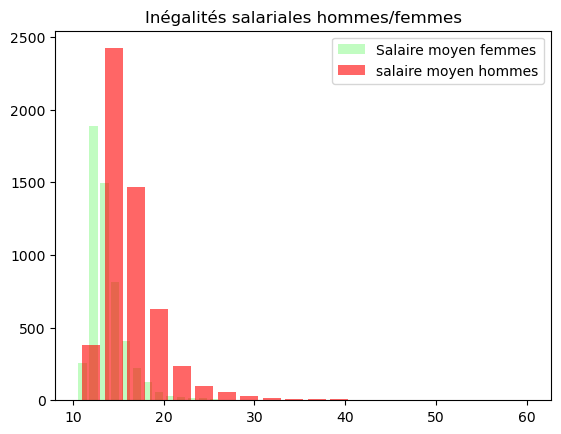

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(salaires_moyens['salaire_moyen_femmes'],
         label='Salaire moyen femmes',
         bins = 20,
         color = 'palegreen',
         alpha=0.6, 
         rwidth = 0.8)
  
plt.hist(salaires_moyens['salaire_moyen_hommes'], 
         label='salaire moyen hommes', 
         alpha=0.6, 
         bins = 20,
         rwidth = 0.8,
         color ='red')
 

plt.legend(loc='upper right')
plt.title('Inégalités salariales hommes/femmes')
plt.show()

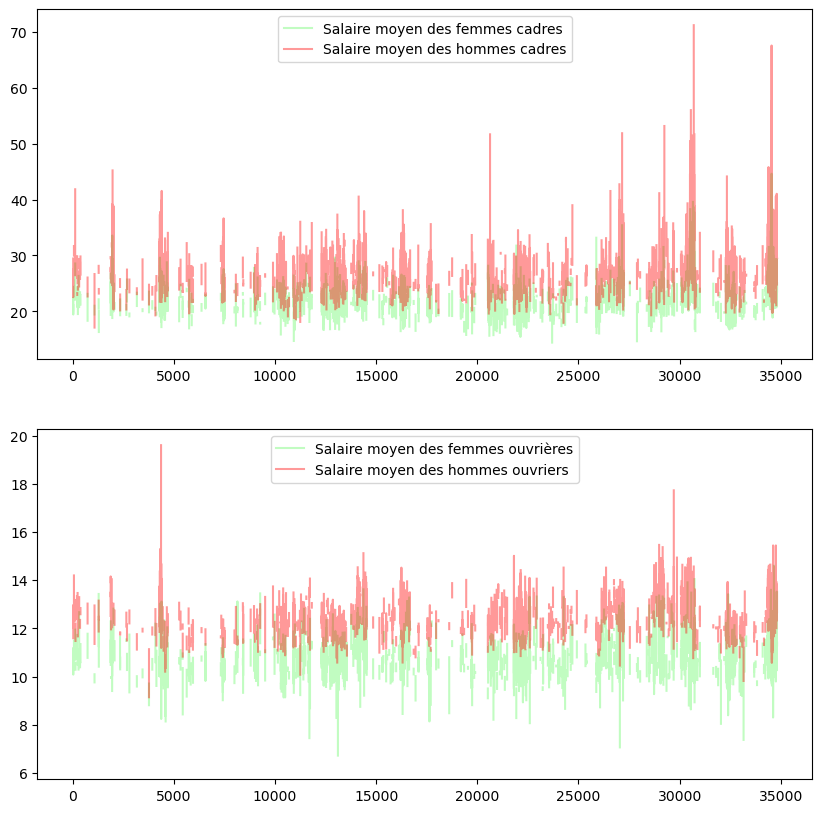

In [48]:
fig = plt.figure( figsize= (10, 10))
                 
plt.subplot(211)                 
plt.plot(salaires_moyens['salaire_cadre_femmes'], c ='palegreen', alpha = 0.6, label = "Salaire moyen des femmes cadres")
plt.plot(salaires_moyens['salaire_cadre_hommes'], c ='red', alpha = 0.4, label = "Salaire moyen des hommes cadres")
plt.legend()          
                 
plt.subplot(212)              
plt.plot(salaires_moyens['salaire_ouvrier_femmes'], c ='palegreen', alpha = 0.6, label = "Salaire moyen des femmes ouvrières")
plt.plot(salaires_moyens['salaire_ouvrier_hommes'], c ='red', alpha = 0.4, label = "Salaire moyen des hommes ouvriers")
plt.legend();           


In [7]:
#Retrait des lignes relatives aux DOM-TOM
indexNames = salaires_moyens[(salaires_moyens['nom_region'] == 'Martinique')
                            |(salaires_moyens['nom_region'] =='Guyane')
                            |(salaires_moyens['nom_region'] =='Mayotte')  
                            |(salaires_moyens['nom_region'] =='Guadeloupe')
                            |(salaires_moyens['nom_region'] =='La Réunion')].index
salaires_moyens.drop(indexNames, axis=0, inplace=True)

salaires_moyens['nom_region'].unique()


array(['Auvergne-Rhône-Alpes', 'Hauts-de-France',
       "Provence-Alpes-Côte d'Azur", 'Grand Est', 'Occitanie',
       'Normandie', 'Nouvelle-Aquitaine', 'Centre-Val de Loire',
       'Bourgogne-Franche-Comté', 'Bretagne', 'Corse', 'Pays de la Loire',
       'Île-de-France'], dtype=object)

In [8]:
#Importation des packages nécessaire Geopandas
import geopandas as gpd
from shapely.geometry import Point 
%matplotlib inline


In [9]:
#On ajoute la geometry au df
points = salaires_moyens.apply(lambda row: Point(row.longitude, row.latitude), axis = 1)
points

0        POINT (4.925850148 46.153721024)
1        POINT (5.428087796 46.009605679)
2        POINT (5.372275427 45.961048852)
3         POINT (4.911967138 45.99616357)
4        POINT (5.594584599 45.749886304)
                       ...               
34821    POINT (1.730457359 49.086021483)
34822    POINT (2.238718551 49.069898107)
34823    POINT (2.403736201 49.007988385)
34824    POINT (2.386594087 49.074551975)
34825    POINT (1.824388034 49.095847161)
Length: 34826, dtype: object

In [10]:
#Transformation du df en geodataframe
gdf = gpd.GeoDataFrame(salaires_moyens, geometry = points)
#On spécifie que nous avons une colonne latitude/longitude
gdf.crs = {'init': 'epsg:4326'}

C:\Users\frede\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

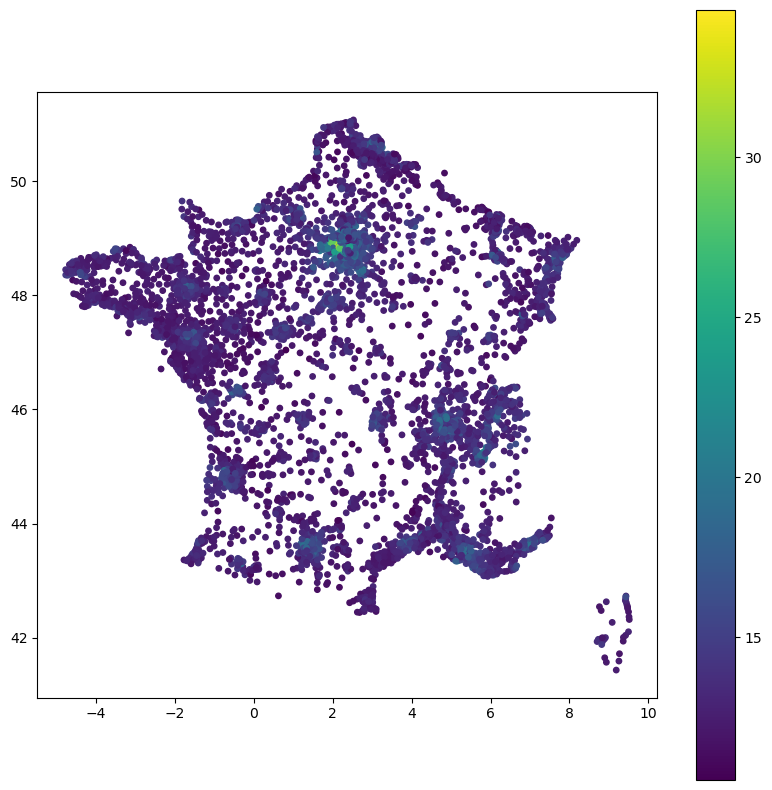

In [40]:
#Distribution du salaire moyen des femmes en France 
gdf.plot(gdf['salaire_moyen_femmes'], legend = 'True', s=15, figsize =(10,10) )

<Axes: >

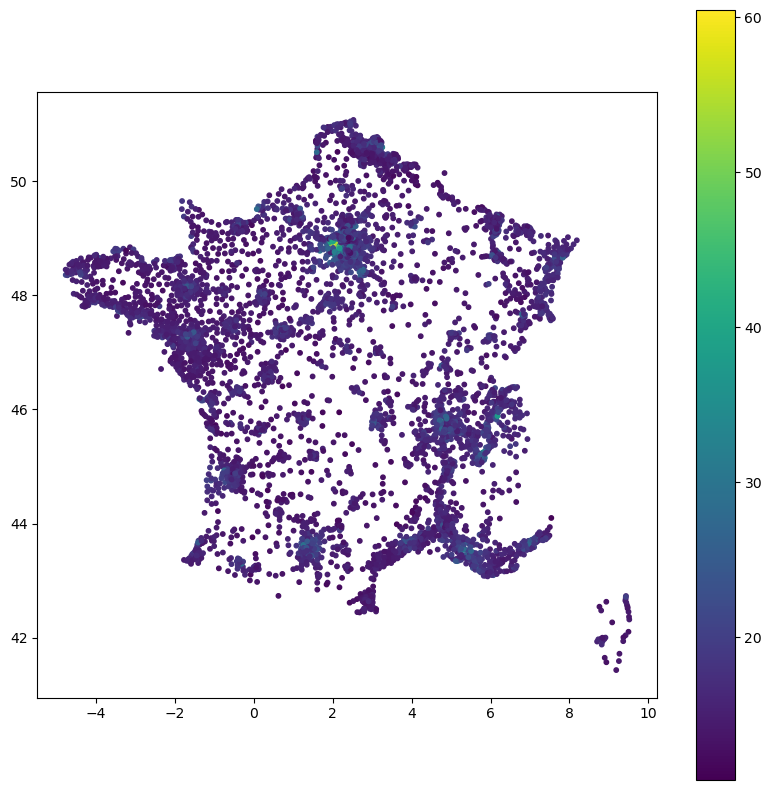

In [38]:
#Distribution du salaire moyen des hommes en France 
gdf.plot(gdf['salaire_moyen_hommes'], legend = 'True', s = 10,figsize =(10,10) )

In [27]:
#création d'une colonne Ecart du salaire entre les hommes et les femmes en %
gdf['ecart_salaire_hommes_femmes'] = (gdf['salaire_moyen_hommes']- gdf['salaire_moyen_femmes'])/gdf['salaire_moyen_femmes'] * 100

<Axes: >

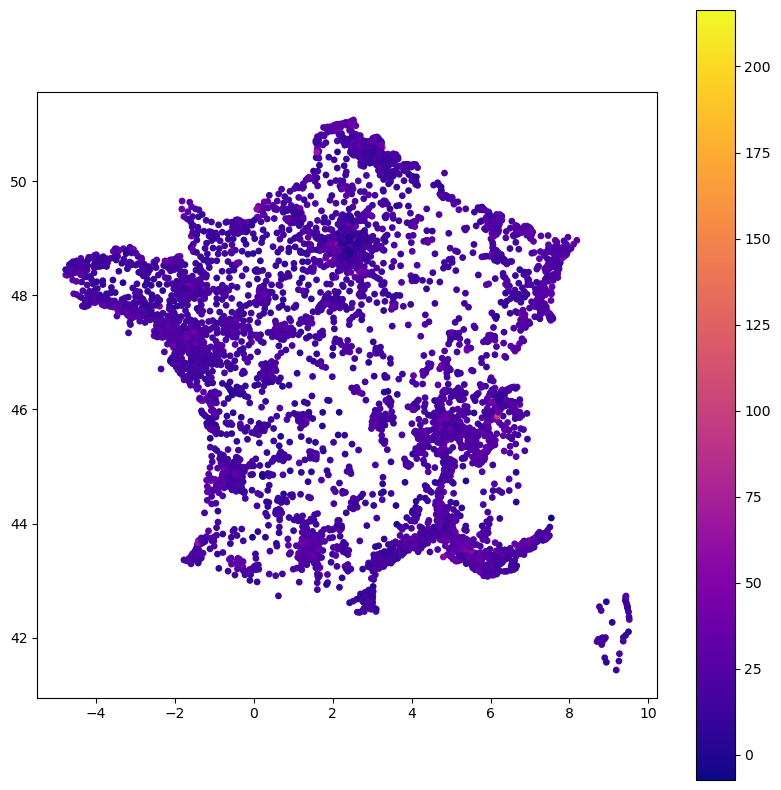

In [37]:
gdf.plot(gdf['ecart_salaire_hommes_femmes'], legend = 'True', cmap = 'plasma', s = 15, figsize =(10,10) )

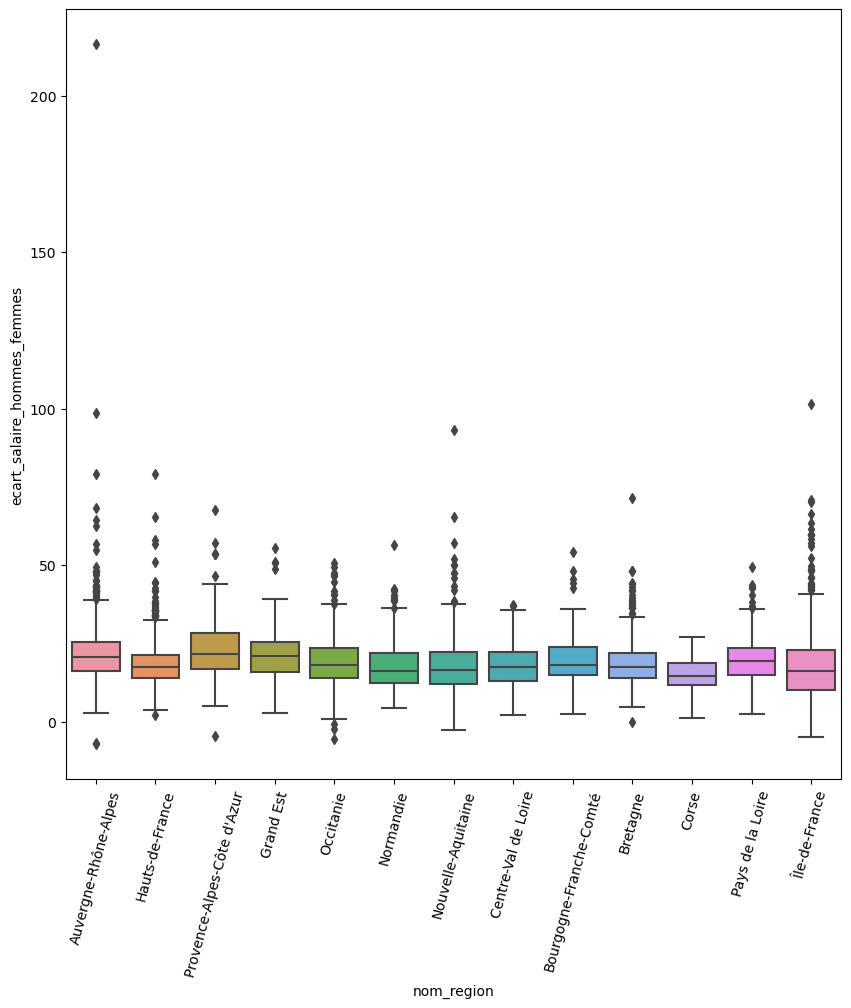

In [59]:

plt.figure(figsize=(10,10))
sns.boxplot(x=gdf['nom_region'],y=gdf['ecart_salaire_hommes_femmes'])
plt.xticks(rotation=75);